In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")


Failed to detect a GPU.


In [3]:
df = pd.read_csv("House_Price_India.csv")
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [4]:
df.shape

(14620, 23)

In [5]:
df.groupby('number of bedrooms')['number of bedrooms'].agg('count')

number of bedrooms
1      136
2     1844
3     6612
4     4724
5     1079
6      176
7       30
8       11
9        3
10       3
11       1
33       1
Name: number of bedrooms, dtype: int64

In [6]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [7]:
df2 = df.drop(['Renovation Year','condition of the house','Built Year','Date','waterfront present','number of views','Area of the basement','Lattitude'	,'Longitude','Area of the house(excluding basement)','Number of schools nearby','living_area_renov','lot_area_renov','grade of the house'],axis='columns')
df2

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,Postal Code,Distance from the airport,Price
0,6762810145,5,2.50,3650,9050,2.0,122003,58,2380000
1,6762810635,4,2.50,2920,4000,1.5,122004,51,1400000
2,6762810998,5,2.75,2910,9480,1.5,122004,53,1200000
3,6762812605,4,2.50,3310,42998,2.0,122005,76,838000
4,6762812919,3,2.00,2710,4500,1.5,122006,51,805000
...,...,...,...,...,...,...,...,...,...
14615,6762830250,2,1.50,1556,20000,1.0,122066,76,221700
14616,6762830339,3,2.00,1680,7000,1.5,122072,59,219200
14617,6762830618,2,1.00,1070,6120,1.0,122056,64,209000
14618,6762830709,4,1.00,1030,6621,1.0,122042,54,205000


In [8]:
df2.isnull().sum()

id                           0
number of bedrooms           0
number of bathrooms          0
living area                  0
lot area                     0
number of floors             0
Postal Code                  0
Distance from the airport    0
Price                        0
dtype: int64

In [9]:
df3 = df2.copy()
df3['number of bedrooms'] = df3['number of bedrooms'].apply(int)
df3['number of bathrooms'] = df3['number of bathrooms'].apply(int)
df3['number of floors'] = df3['number of floors'].apply(int)
df3



,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,Postal Code,Distance from the airport,Price
0,6762810145,5,2,3650,9050,2,122003,58,2380000
1,6762810635,4,2,2920,4000,1,122004,51,1400000
2,6762810998,5,2,2910,9480,1,122004,53,1200000
3,6762812605,4,2,3310,42998,2,122005,76,838000
4,6762812919,3,2,2710,4500,1,122006,51,805000
...,...,...,...,...,...,...,...,...,...
14615,6762830250,2,1,1556,20000,1,122066,76,221700
14616,6762830339,3,2,1680,7000,1,122072,59,219200
14617,6762830618,2,1,1070,6120,1,122056,64,209000
14618,6762830709,4,1,1030,6621,1,122042,54,205000


In [10]:
def cor(x):
    if x == 0:
        return True
    else: 
        return False 
#check if any value is 0 or not

In [11]:
df3[df3['number of bathrooms'].apply(cor)]

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,Postal Code,Distance from the airport,Price
664,6762829946,2,0,650,5360,1,122038,52,230000
1172,6762824406,2,0,850,7710,1,122059,61,360000
1283,6762828168,1,0,1170,14149,1,122068,57,275000
1334,6762818371,1,0,820,59677,1,122008,50,527550
1382,6762831615,1,0,430,5050,1,122041,71,80000
2034,6762827250,1,0,560,12120,1,122041,61,299000
2397,6762824844,2,0,1392,43710,1,122069,63,350000
2595,6762827929,1,0,420,6720,1,122059,58,280000
2906,6762831474,4,0,1440,13300,1,122031,77,142500
3204,6762829463,1,0,380,15000,1,122056,56,245000


In [12]:
df3.loc[15] #detail of row at postion 15.

id                           6762815748
number of bedrooms                    4
number of bathrooms                   2
living area                        2820
lot area                           8408
number of floors                      2
Postal Code                      122014
Distance from the airport            55
Price                            625000
Name: 15, dtype: int64

In [13]:
df2.isnull().sum()

id                           0
number of bedrooms           0
number of bathrooms          0
living area                  0
lot area                     0
number of floors             0
Postal Code                  0
Distance from the airport    0
Price                        0
dtype: int64

In [14]:
def rem(x):
    if x==0.0: 
        return None
    else: 
        return x

In [15]:
df3['number of bathrooms'] = df3['number of bathrooms'].apply(rem)


In [16]:
df3

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,Postal Code,Distance from the airport,Price
0,6762810145,5,2.0,3650,9050,2,122003,58,2380000
1,6762810635,4,2.0,2920,4000,1,122004,51,1400000
2,6762810998,5,2.0,2910,9480,1,122004,53,1200000
3,6762812605,4,2.0,3310,42998,2,122005,76,838000
4,6762812919,3,2.0,2710,4500,1,122006,51,805000
...,...,...,...,...,...,...,...,...,...
14615,6762830250,2,1.0,1556,20000,1,122066,76,221700
14616,6762830339,3,2.0,1680,7000,1,122072,59,219200
14617,6762830618,2,1.0,1070,6120,1,122056,64,209000
14618,6762830709,4,1.0,1030,6621,1,122042,54,205000


In [17]:
df3['number of bathrooms'].unique()

array([ 2.,  3.,  1.,  8.,  4.,  5.,  6., nan,  7.])

In [18]:
df3.dropna(inplace=True)

In [19]:
df3['number of bathrooms'] = df3['number of bathrooms'].apply(int)

In [20]:
df4 = df3.copy()
df4['price per sq feet'] = df4['Price']/df4['living area']
df4

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,Postal Code,Distance from the airport,Price,price per sq feet
0,6762810145,5,2,3650,9050,2,122003,58,2380000,652.054795
1,6762810635,4,2,2920,4000,1,122004,51,1400000,479.452055
2,6762810998,5,2,2910,9480,1,122004,53,1200000,412.371134
3,6762812605,4,2,3310,42998,2,122005,76,838000,253.172205
4,6762812919,3,2,2710,4500,1,122006,51,805000,297.047970
...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,2,1,1556,20000,1,122066,76,221700,142.480720
14616,6762830339,3,2,1680,7000,1,122072,59,219200,130.476190
14617,6762830618,2,1,1070,6120,1,122056,64,209000,195.327103
14618,6762830709,4,1,1030,6621,1,122042,54,205000,199.029126


In [21]:
df4['Postal Code'].unique()

array([122003, 122004, 122005, 122006, 122007, 122008, 122009, 122010,
       122011, 122012, 122013, 122014, 122015, 122016, 122017, 122018,
       122019, 122020, 122021, 122022, 122023, 122024, 122025, 122026,
       122027, 122028, 122029, 122030, 122031, 122032, 122033, 122034,
       122035, 122036, 122037, 122038, 122039, 122040, 122041, 122042,
       122043, 122044, 122045, 122046, 122047, 122048, 122049, 122050,
       122051, 122052, 122053, 122054, 122055, 122056, 122057, 122058,
       122059, 122060, 122061, 122062, 122063, 122064, 122065, 122066,
       122067, 122068, 122069, 122070, 122071, 122072], dtype=int64)

In [22]:
loc_stat= df4.groupby('Postal Code')['Postal Code'].agg('count').sort_values(ascending = False)
loc_stat.head(70)

Postal Code
122028    431
122005    416
122006    396
122007    395
122033    383
         ... 
122013     77
122062     61
122036     48
122060     39
122071     37
Name: Postal Code, Length: 70, dtype: int64

In [23]:


# Display all 70 results
print(loc_stat)

Postal Code
122028    431
122005    416
122006    396
122007    395
122033    383
         ... 
122013     77
122062     61
122036     48
122060     39
122071     37
Name: Postal Code, Length: 70, dtype: int64


In [24]:
#outliers removing 
#create table for area/bhk
df5= df4.copy()

In [25]:
df5['area/bedroom']= df5['living area']/df5['number of bathrooms']

In [26]:
df5

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,Postal Code,Distance from the airport,Price,price per sq feet,area/bedroom
0,6762810145,5,2,3650,9050,2,122003,58,2380000,652.054795,1825.0
1,6762810635,4,2,2920,4000,1,122004,51,1400000,479.452055,1460.0
2,6762810998,5,2,2910,9480,1,122004,53,1200000,412.371134,1455.0
3,6762812605,4,2,3310,42998,2,122005,76,838000,253.172205,1655.0
4,6762812919,3,2,2710,4500,1,122006,51,805000,297.047970,1355.0
...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,2,1,1556,20000,1,122066,76,221700,142.480720,1556.0
14616,6762830339,3,2,1680,7000,1,122072,59,219200,130.476190,840.0
14617,6762830618,2,1,1070,6120,1,122056,64,209000,195.327103,1070.0
14618,6762830709,4,1,1030,6621,1,122042,54,205000,199.029126,1030.0


In [27]:
df5[df5['area/bedroom'] < 600].sort_values(by='area/bedroom' ,ascending = True )


,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,Postal Code,Distance from the airport,Price,price per sq feet,area/bedroom
13445,6762820563,3,4,1390,1569,2,122004,77,458000,329.496403,347.500000
7212,6762828632,5,4,1400,8580,1,122070,69,265000,189.285714,350.000000
5867,6762827101,3,2,720,7598,1,122034,72,300000,416.666667,360.000000
13517,6762820372,2,2,730,5000,1,122064,62,464000,635.616438,365.000000
1358,6762823829,2,2,750,1468,2,122044,75,375000,500.000000,375.000000
...,...,...,...,...,...,...,...,...,...,...,...
3621,6762830791,3,2,1190,6833,1,122023,52,200000,168.067227,595.000000
13901,6762823514,4,3,1790,2460,2,122034,54,385000,215.083799,596.666667
8680,6762829325,3,3,1790,2003,2,122059,60,249950,139.636872,596.666667
11607,6762829425,3,3,1790,1682,2,122059,51,246950,137.960894,596.666667


In [28]:
df5[df5['living area']>df5['lot area']].sort_values(by= 'lot area',ascending = True)

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,Postal Code,Distance from the airport,Price,price per sq feet,area/bedroom
11107,6762814373,4,1,2420,520,1,122047,54,700000,289.256198,2420.0
14005,6762828978,2,2,1070,635,2,122034,76,256950,240.140187,535.0
3788,6762818703,1,1,1100,638,3,122047,76,516500,469.545455,1100.0
6508,6762826991,2,1,950,676,2,122054,61,304000,320.000000,950.0
310,6762825420,2,1,820,681,3,122028,56,339950,414.573171,820.0
...,...,...,...,...,...,...,...,...,...,...,...
1801,6762816086,5,2,3990,3839,1,122047,60,610000,152.882206,1995.0
2059,6762810797,6,4,3902,3880,3,122009,77,1300000,333.162481,975.5
12215,6762811661,4,1,4060,4000,2,122032,74,970000,238.916256,4060.0
1383,6762810219,5,4,4580,4443,3,122020,69,2000000,436.681223,1145.0


In [29]:
df6 = df5[~(df5['area/bedroom'] < 600)]
df6 = df5[~(df5['living area']>df5['lot area'])]
df5.shape

(14570, 11)

In [30]:
df6.shape

(14032, 11)

In [31]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Postal Code'):
        m = np.mean(subdf['price per sq feet'])
        st = np.std(subdf['price per sq feet'])
        reduced_df = subdf[(subdf['price per sq feet']>(m-st)) & (subdf['price per sq feet']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10572, 11)

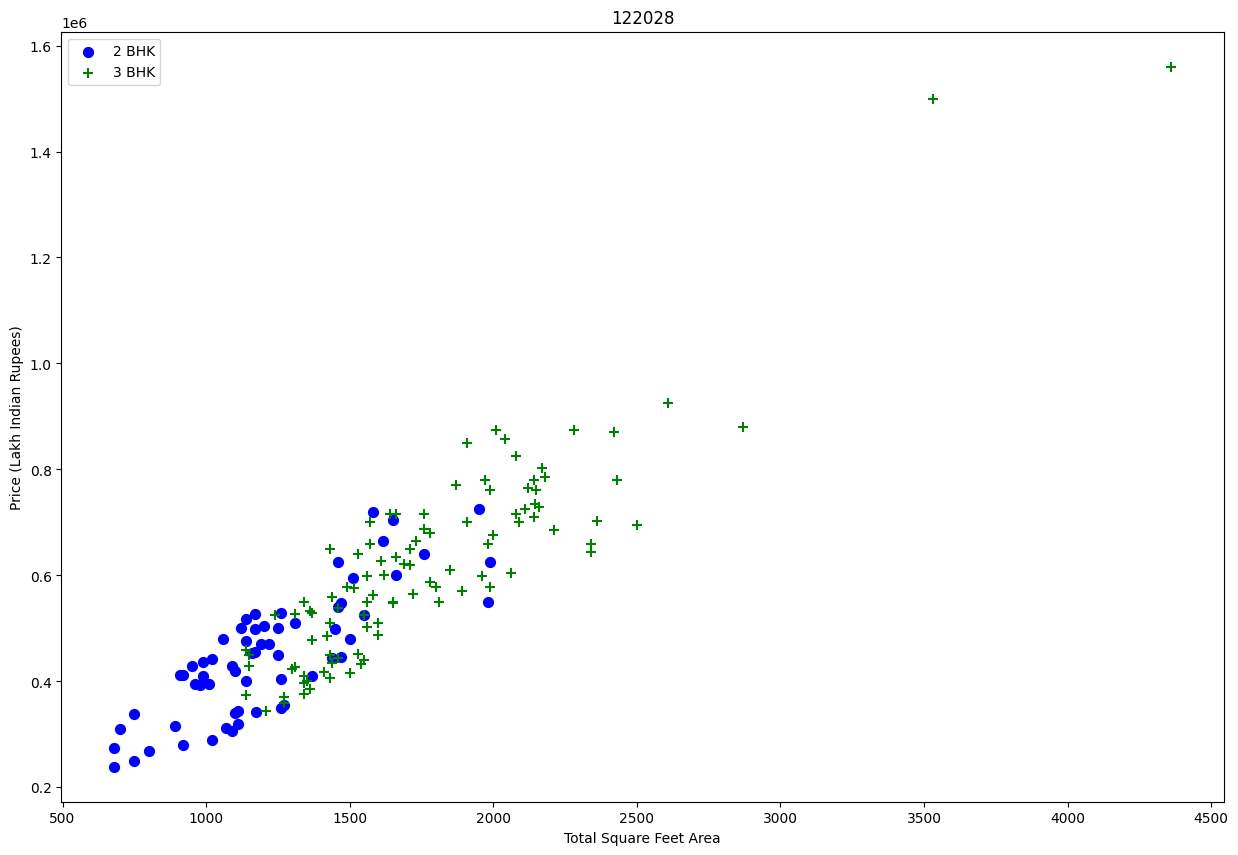

In [32]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df['Postal Code']==location) & (df['number of bedrooms']==2)]
    bhk3 = df[(df['Postal Code']==location) & (df['number of bedrooms']==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['living area'],bhk2.Price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['living area'],bhk3.Price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,122028)

In [33]:
df7.shape

(10572, 11)

In [34]:
def remove_bhk_bath_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Postal Code'):
        bhk_bath_stats = {}
        for bhk, bhk_df in location_df.groupby('number of bedrooms'):
            for bath, bath_df in bhk_df.groupby('number of bathrooms'):
                bhk_bath_stats[(bhk, bath)] = {
                    'mean': np.mean(bath_df['price per sq feet']),
                    'std': np.std(bath_df['price per sq feet']),
                    'count': bath_df.shape[0]
                }
        for (bhk, bath), stats in bhk_bath_stats.items():
            if stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, location_df[
                    (location_df['number of bedrooms'] == bhk) & 
                    (location_df['number of bathrooms'] == bath) & 
                    (location_df['price per sq feet'] < stats['mean'])
                ].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_bath_outliers(df7)
df8.shape


(5641, 11)

In [35]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Postal Code'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('number of bedrooms'):
            bhk_stats[bhk] = {
                'mean_bhk': np.mean(bhk_df['price per sq feet']),
                'std_bhk': np.std(bhk_df['price per sq feet']),
                'count_bhk': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('number of bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count_bhk']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price per sq feet']<(stats['mean_bhk'])].index.values)
    return df.drop(exclude_indices,axis='index')


df9 = remove_bhk_outliers(df7)
df9.shape

(5406, 11)

In [36]:
def remove_bhk_bath_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Postal Code'):
        bhk_stats = {}
        bath_stats = {}
        for bhk, bhk_df in location_df.groupby('number of bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price per sq feet']),
                'std': np.std(bhk_df['price per sq feet']),
                'count': bhk_df.shape[0]
            }
        for bath, bath_df in location_df.groupby('number of bathrooms'):
            bath_stats[bath] = {
                'mean': np.mean(bath_df['price per sq feet']),
                'std': np.std(bath_df['price per sq feet']),
                'count': bath_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('number of bedrooms'):
            for bath, bath_df in location_df.groupby('number of bathrooms'):
                bhk_mean = bhk_stats.get(bhk, {'mean': 0})['mean']
                bath_mean = bath_stats.get(bath, {'mean': 0})['mean']
                if bhk < bhk_mean and bath < bath_mean:
                    exclude_indices = np.append(exclude_indices, bhk_df[
                        (bhk_df['price per sq feet'] < bhk_mean) & (bath_df['price per sq feet'] < bath_mean)
                    ].index.values)
    return df.drop(exclude_indices, axis='index')

df10 = remove_bhk_bath_outlier(df7)
df10.shape

C:\Users\Admin\AppData\Local\Temp\ipykernel_34552\376905483.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exclude_indices = np.append(exclude_indices, bhk_df[
C:\Users\Admin\AppData\Local\Temp\ipykernel_34552\376905483.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exclude_indices = np.append(exclude_indices, bhk_df[
C:\Users\Admin\AppData\Local\Temp\ipykernel_34552\376905483.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exclude_indices = np.append(exclude_indices, bhk_df[
C:\Users\Admin\AppData\Local\Temp\ipykernel_34552\376905483.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exclude_indices = np.append(exclude_indices, bhk_df[
C:\Users\Admin\AppData\Local\Temp\ipykernel_34552\376905483.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exclude_indices = np.append(exclude_indices, bhk_df[
C:\Users\A

(5584, 11)

In [37]:
df10

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,Postal Code,Distance from the airport,Price,price per sq feet,area/bedroom
1,6762815557,2,1,1230,3600,1,122003,79,636000,517.073171,1230.000000
3,6762821371,2,1,980,1179,2,122003,77,438000,446.938776,980.000000
7,6762811208,4,3,2930,3200,1,122003,62,1100000,375.426621,976.666667
8,6762811869,4,2,2200,4000,2,122003,50,930000,422.727273,1100.000000
10,6762812968,3,2,1620,4500,2,122003,72,800000,493.827160,810.000000
...,...,...,...,...,...,...,...,...,...,...,...
10562,6762829746,4,1,1650,6900,1,122072,55,238000,144.242424,1650.000000
10564,6762831352,3,1,1060,8000,1,122072,74,160000,150.943396,1060.000000
10567,6762830037,4,1,1570,6717,1,122072,59,229950,146.464968,1570.000000
10568,6762829733,4,1,1500,12560,1,122072,72,239000,159.333333,1500.000000


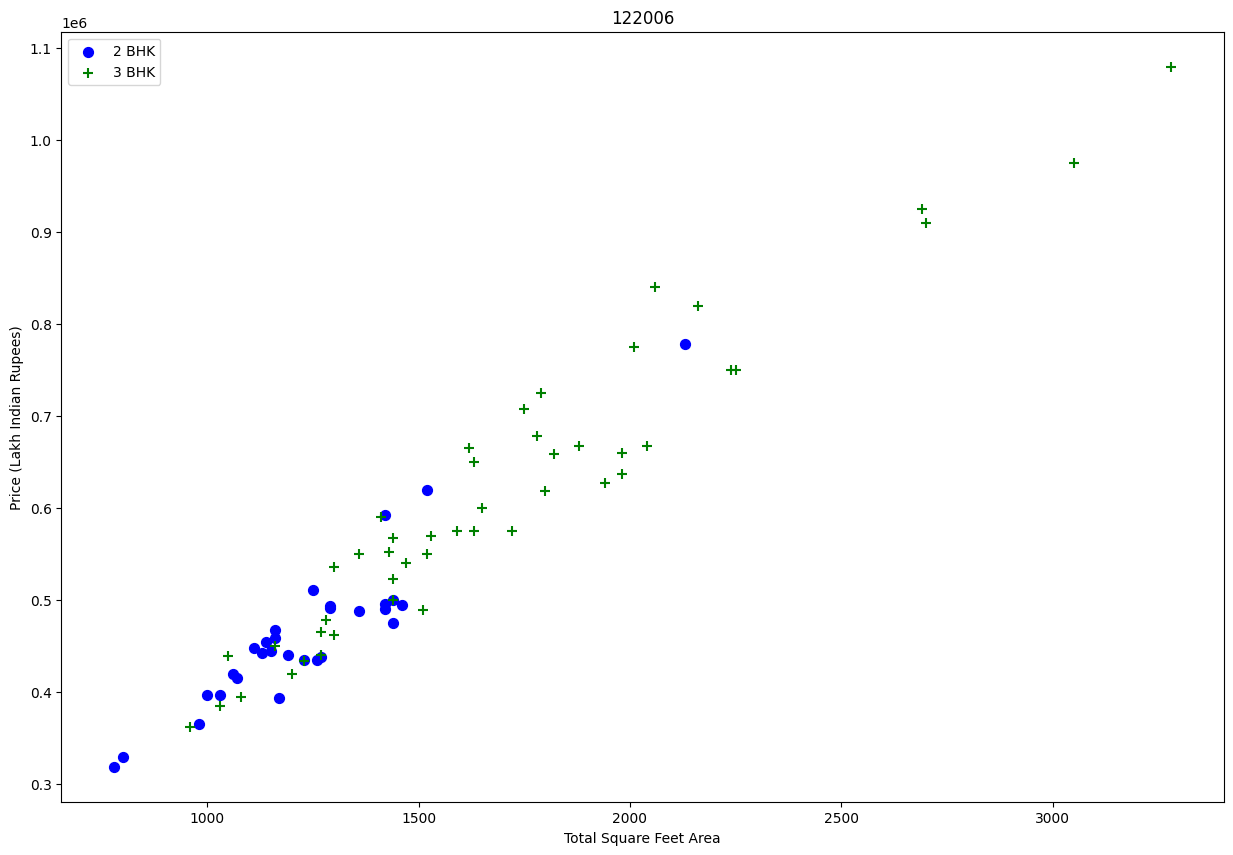

In [38]:
plot_scatter_chart(df10,122006)

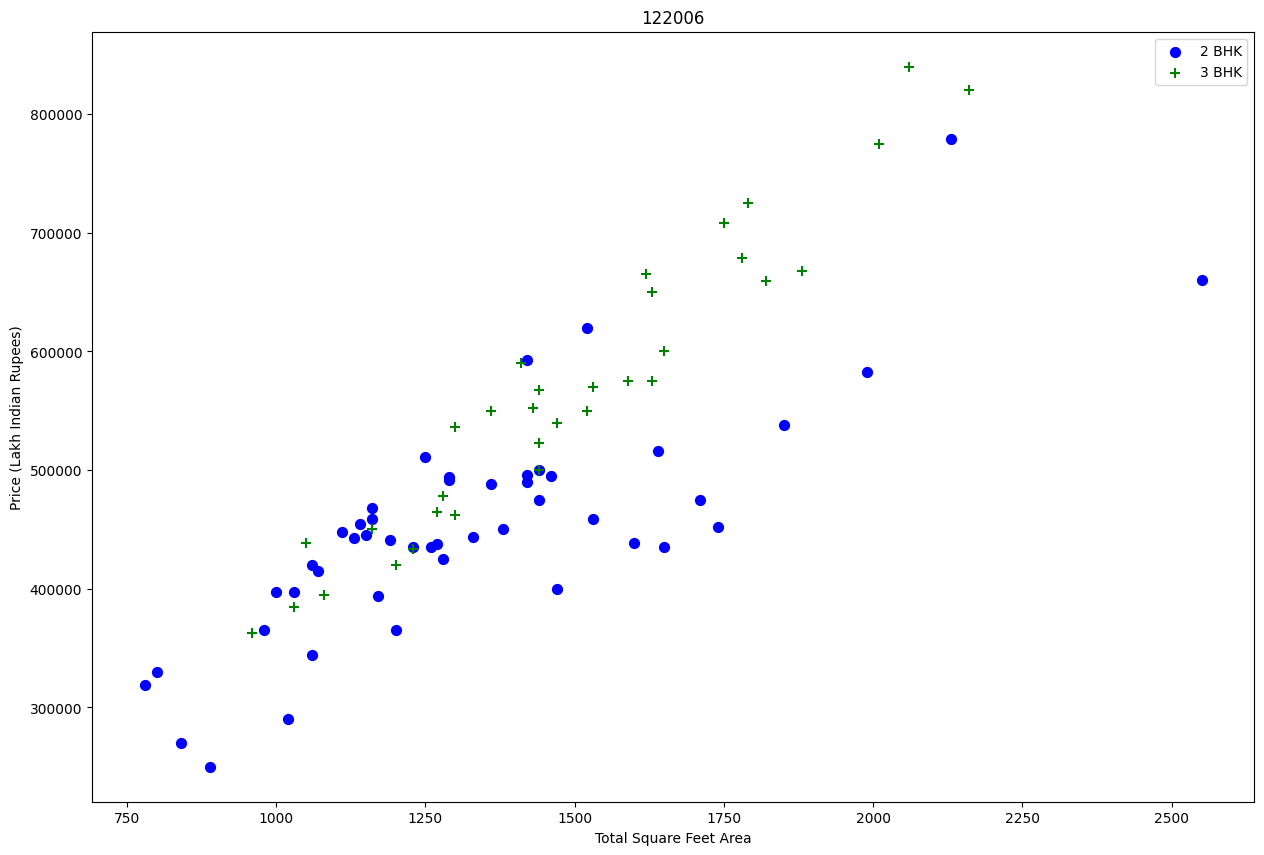

In [39]:
plot_scatter_chart(df9,122006)

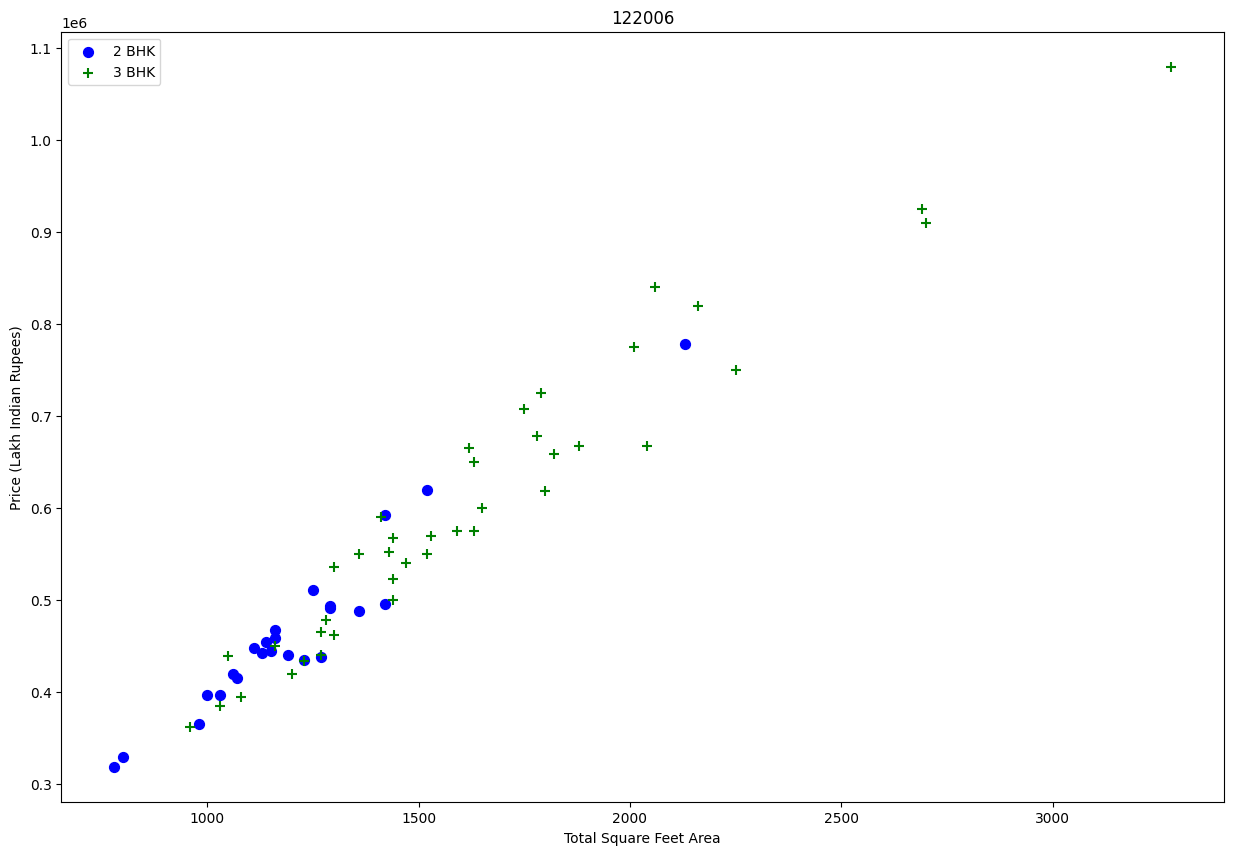

In [40]:
plot_scatter_chart(df8,122006)

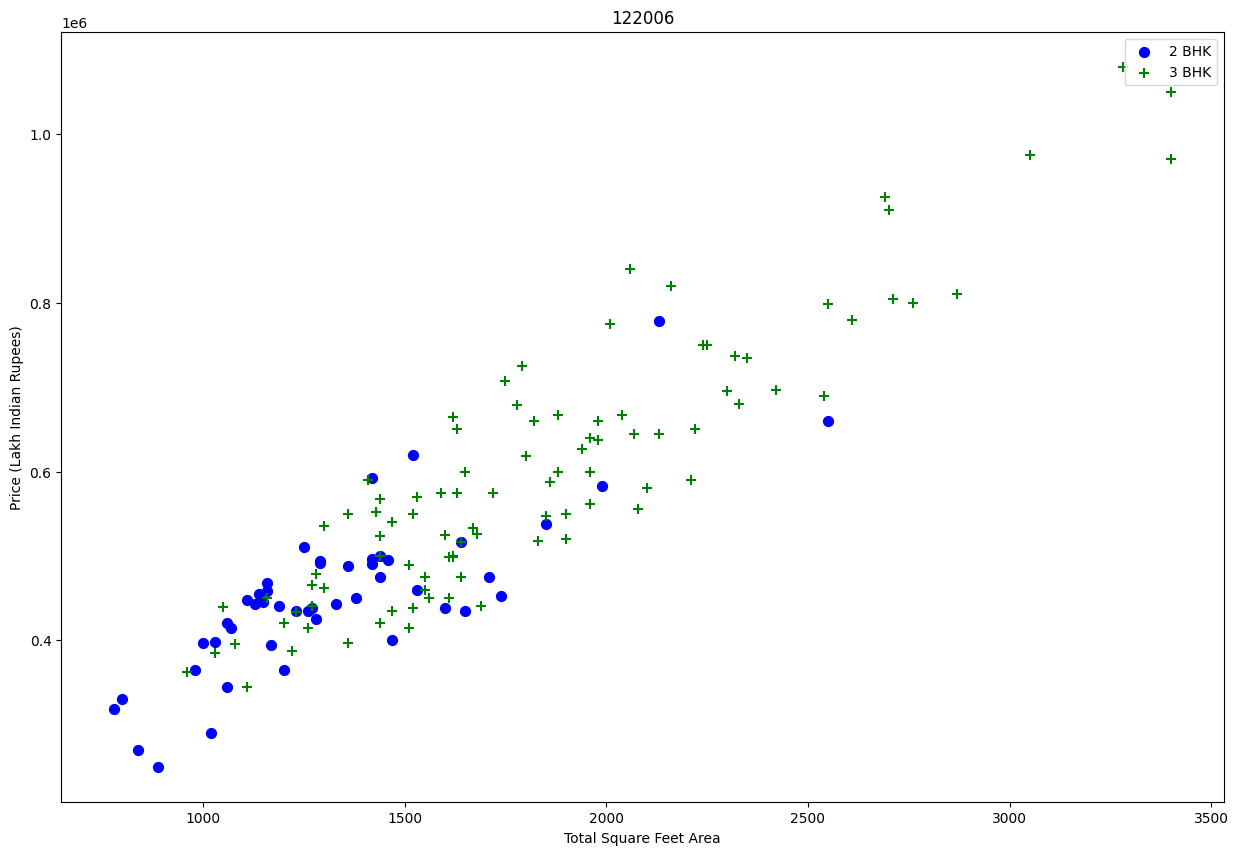

In [41]:
plot_scatter_chart(df7,122006)

Text(0, 0.5, 'Count')

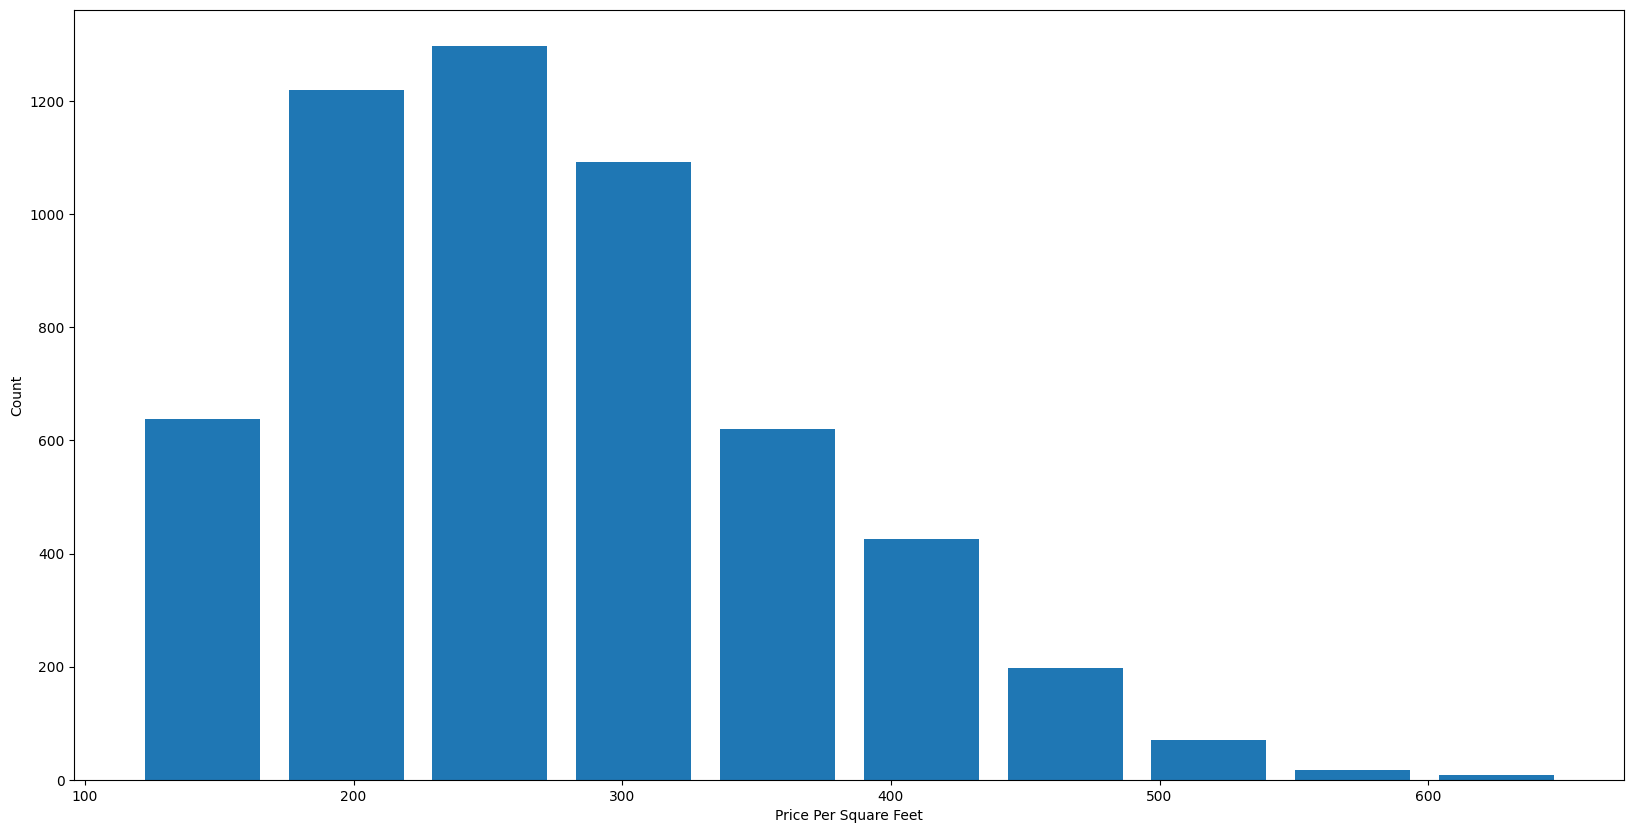

In [42]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df10['price per sq feet'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

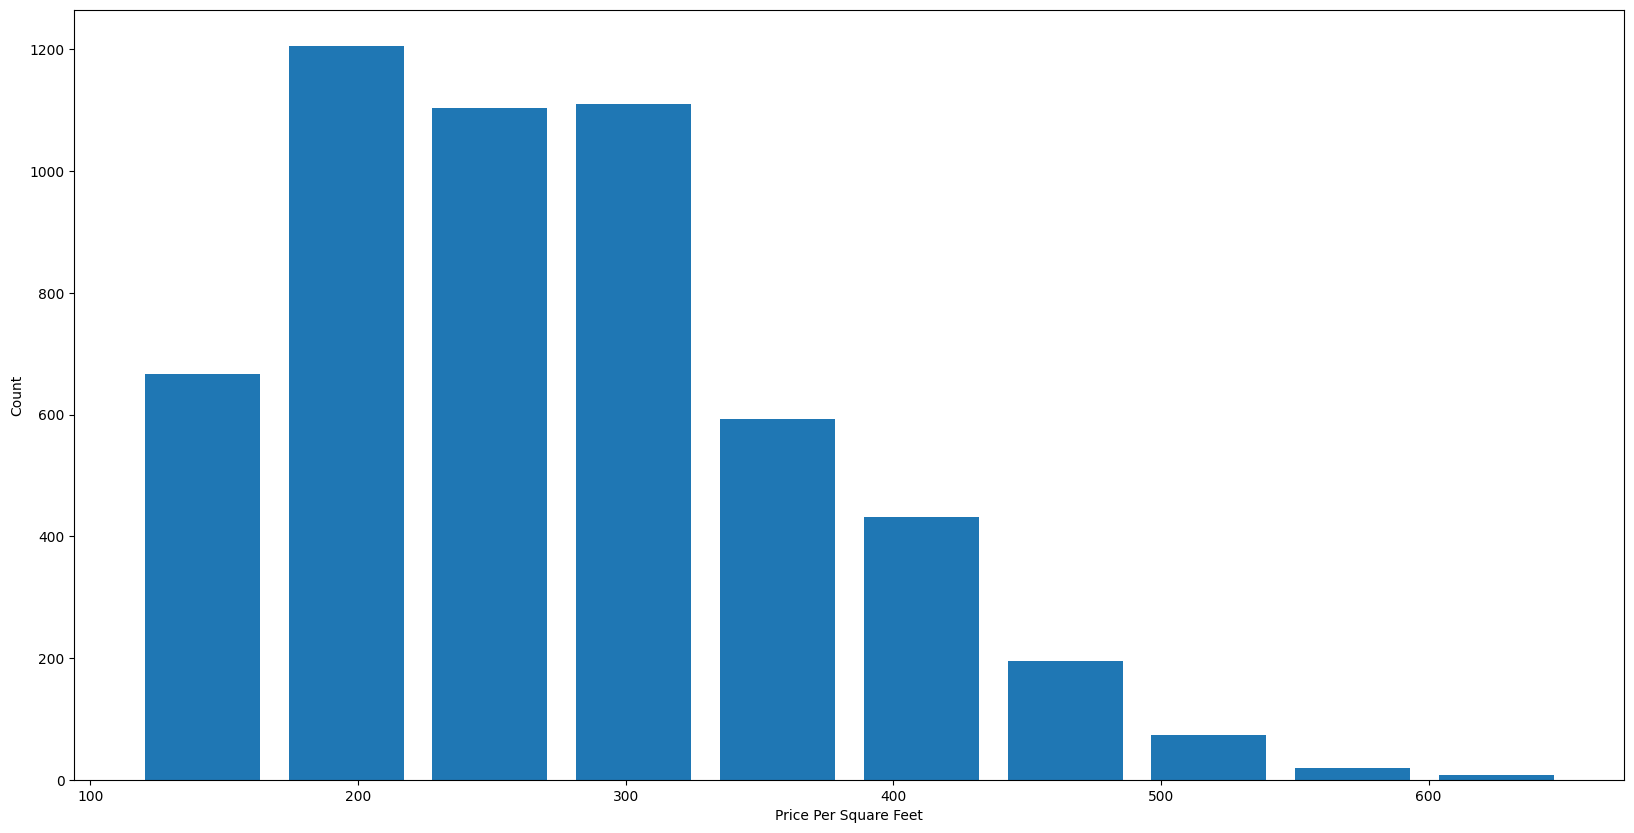

In [43]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df9['price per sq feet'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

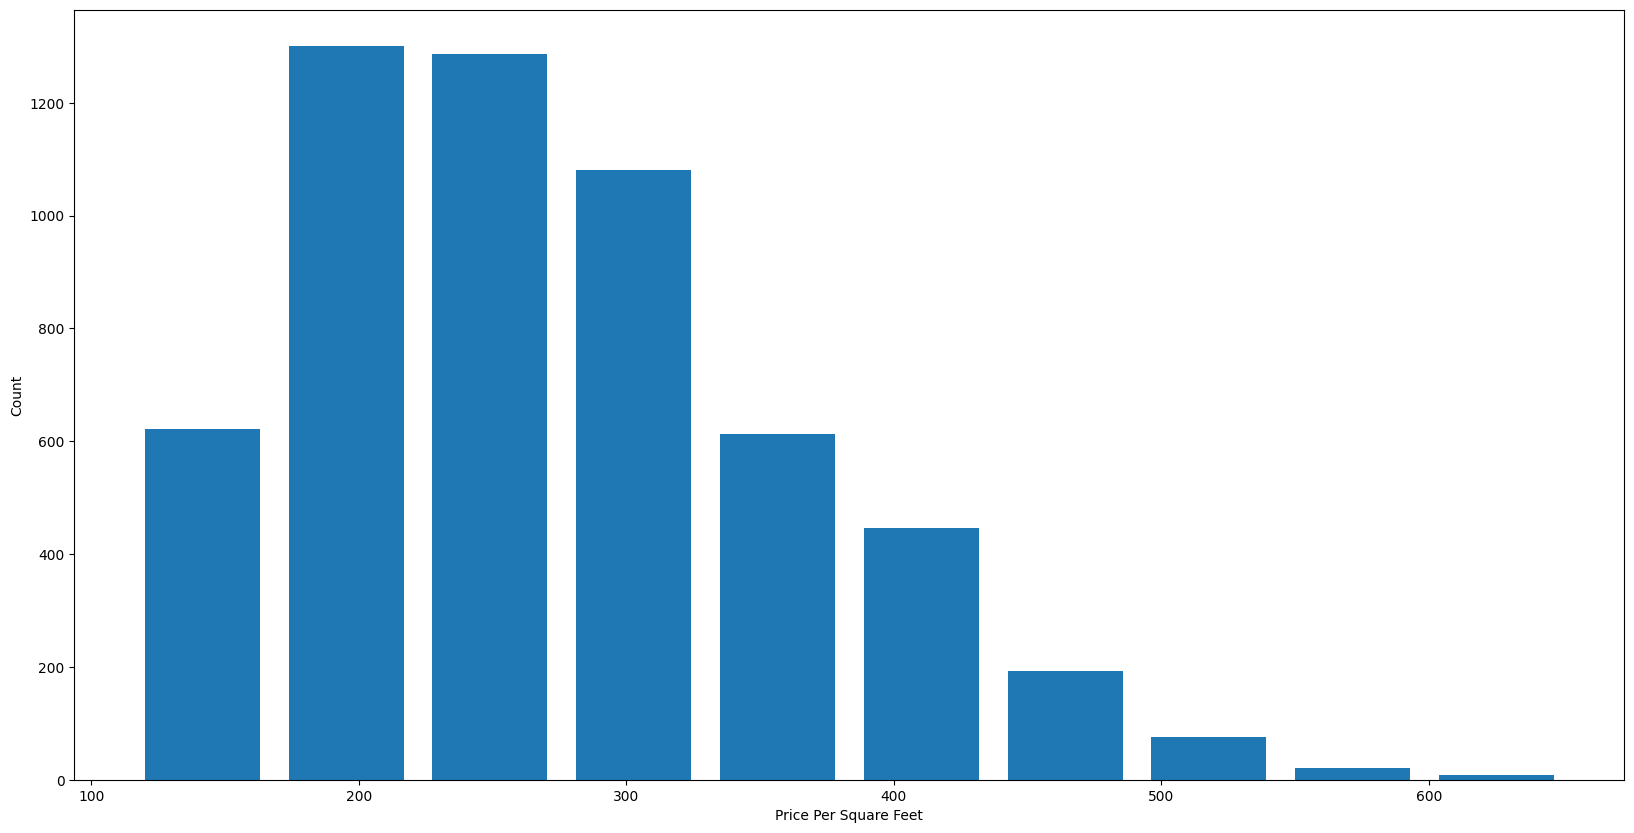

In [44]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8['price per sq feet'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

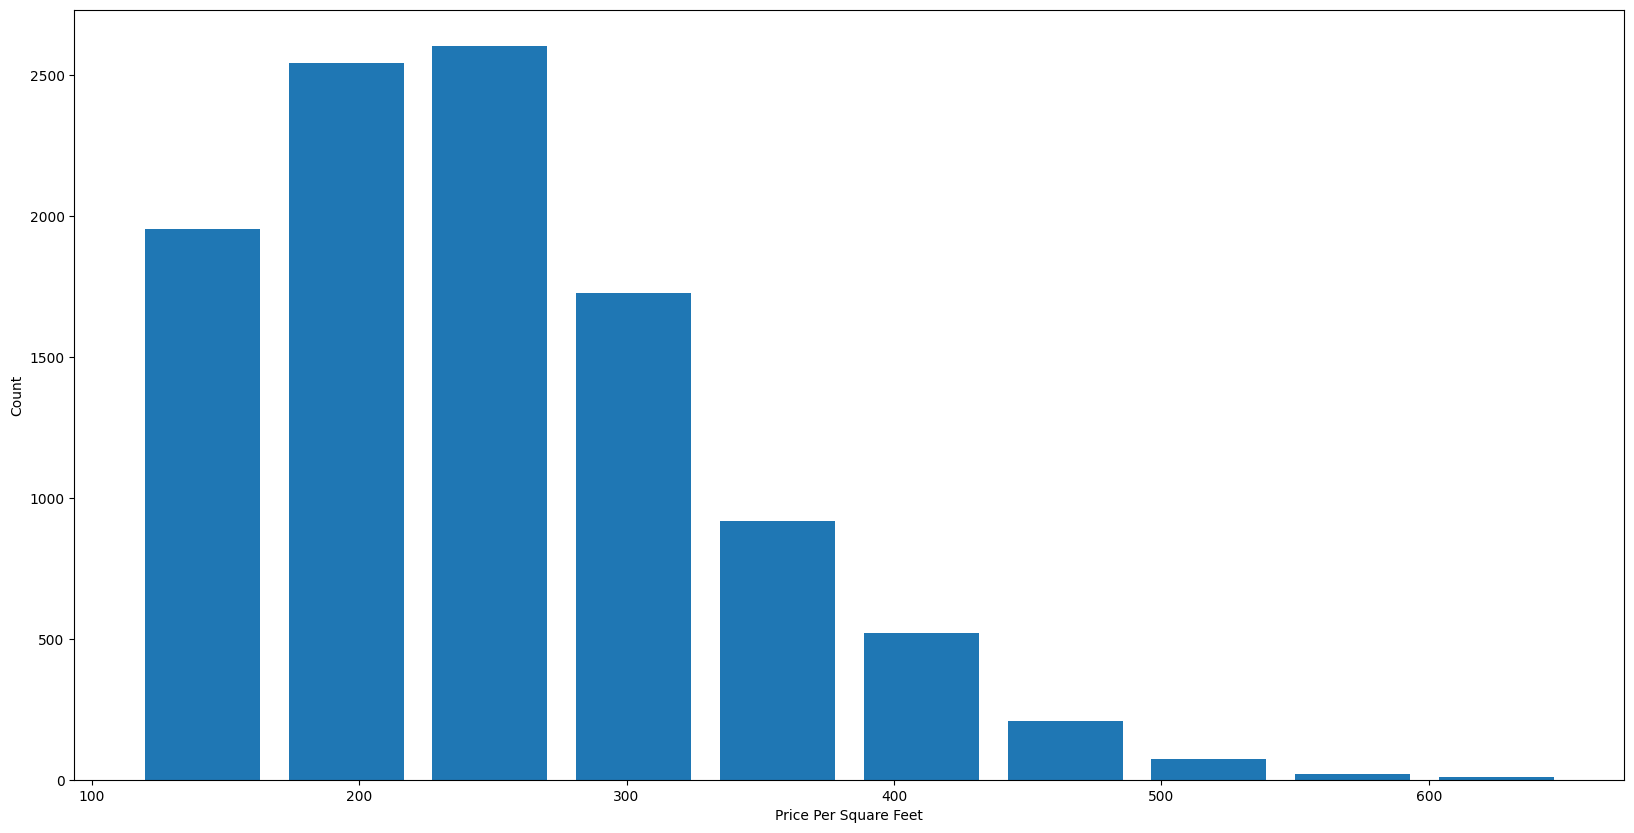

In [45]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7['price per sq feet'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [46]:
df11 = df10[df10['number of bathrooms']<=df10['number of bedrooms']+1]
df11.shape

(5584, 11)

In [47]:
df11

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,Postal Code,Distance from the airport,Price,price per sq feet,area/bedroom
1,6762815557,2,1,1230,3600,1,122003,79,636000,517.073171,1230.000000
3,6762821371,2,1,980,1179,2,122003,77,438000,446.938776,980.000000
7,6762811208,4,3,2930,3200,1,122003,62,1100000,375.426621,976.666667
8,6762811869,4,2,2200,4000,2,122003,50,930000,422.727273,1100.000000
10,6762812968,3,2,1620,4500,2,122003,72,800000,493.827160,810.000000
...,...,...,...,...,...,...,...,...,...,...,...
10562,6762829746,4,1,1650,6900,1,122072,55,238000,144.242424,1650.000000
10564,6762831352,3,1,1060,8000,1,122072,74,160000,150.943396,1060.000000
10567,6762830037,4,1,1570,6717,1,122072,59,229950,146.464968,1570.000000
10568,6762829733,4,1,1500,12560,1,122072,72,239000,159.333333,1500.000000


In [48]:
pd.reset_option('display.max_rows', None)

In [49]:
#pandas dummy method to encode text data to numerical categorical
# not used here
#dummy= pd.get_dummies(example_data_frame.attribute)
#df_new=example_data_frame.drop('attribute',axis='coloumns')

In [50]:
df10.shape
df10.columns

Index(['id', 'number of bedrooms', 'number of bathrooms', 'living area',
       'lot area', 'number of floors', 'Postal Code',
       'Distance from the airport', 'Price', 'price per sq feet',
       'area/bedroom'],
      dtype='object')

In [51]:
x=df11.drop(['id','Price','price per sq feet','area/bedroom'],axis='columns')
x.head(3)

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,Postal Code,Distance from the airport
1,2,1,1230,3600,1,122003,79
3,2,1,980,1179,2,122003,77
7,4,3,2930,3200,1,122003,62


In [52]:
y= df11.Price
y.head(3)

1     636000
3     438000
7    1100000
Name: Price, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [88]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.645501022847574

In [92]:
lr_clf.intercept_
lr_clf.coef_

array([-3.12117959e+04, -6.51885577e+03,  3.62389899e+02, -1.05655175e+00,
       -5.51203244e+04, -1.03858441e+03,  9.22140719e+01])

In [93]:
pre= lr_clf.predict(x_train)
pre

array([621623.68086544, 384936.53232436, 522612.87920044, ...,
       744724.75685358, 383209.719375  , 371125.32303306])

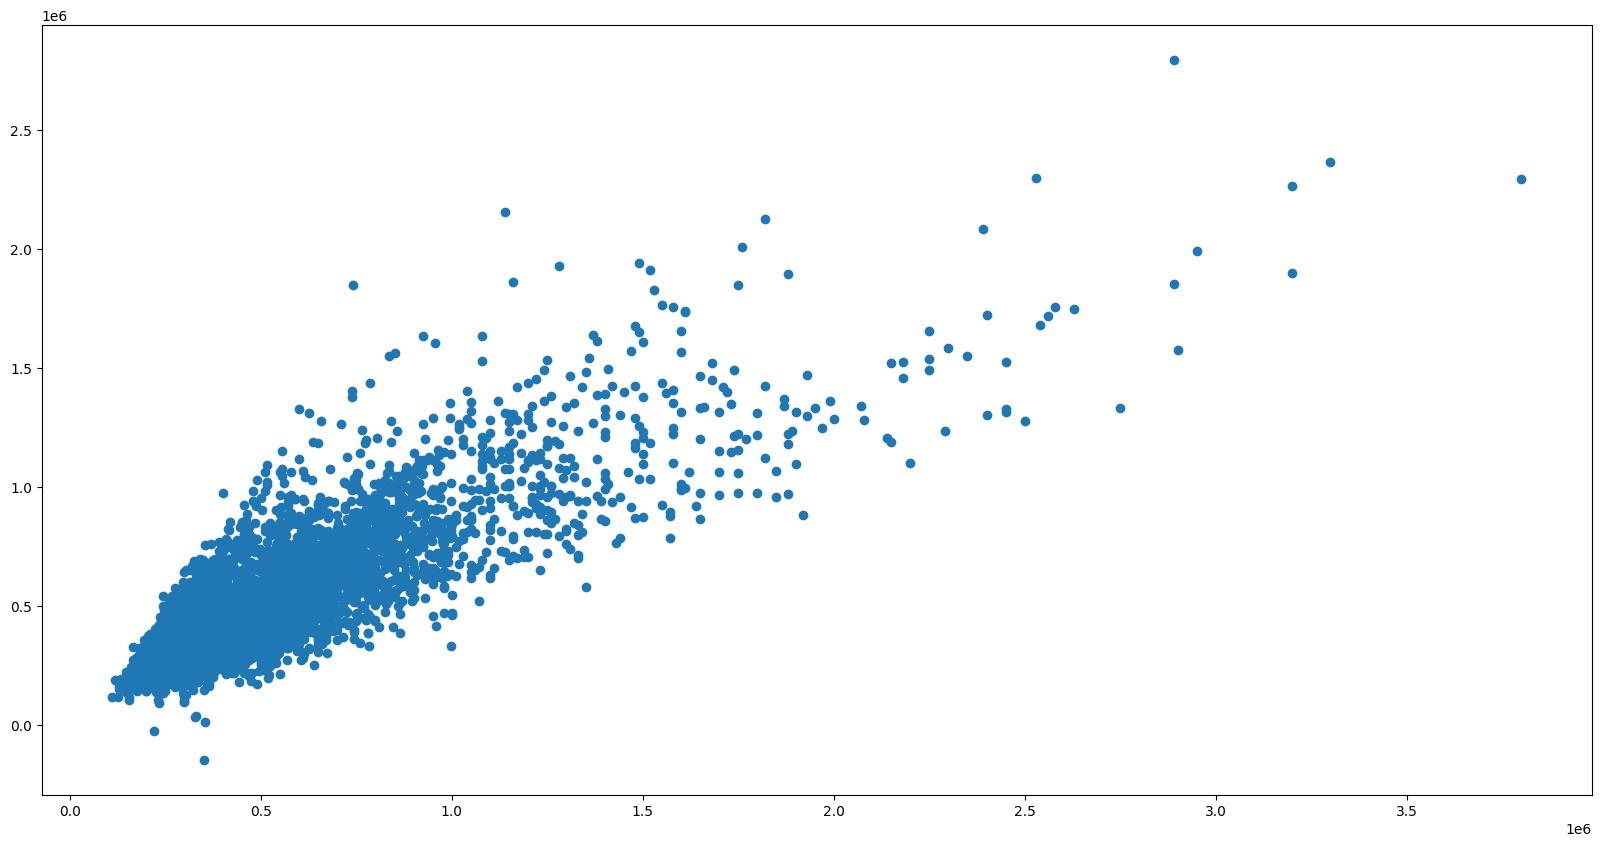

In [94]:
import matplotlib.pyplot as plt 
plt.scatter(y_train,pre)
plt.show()

In [97]:
from sklearn.metrics import r2_score
r2_score(y_train,pre)

0.678279059930577

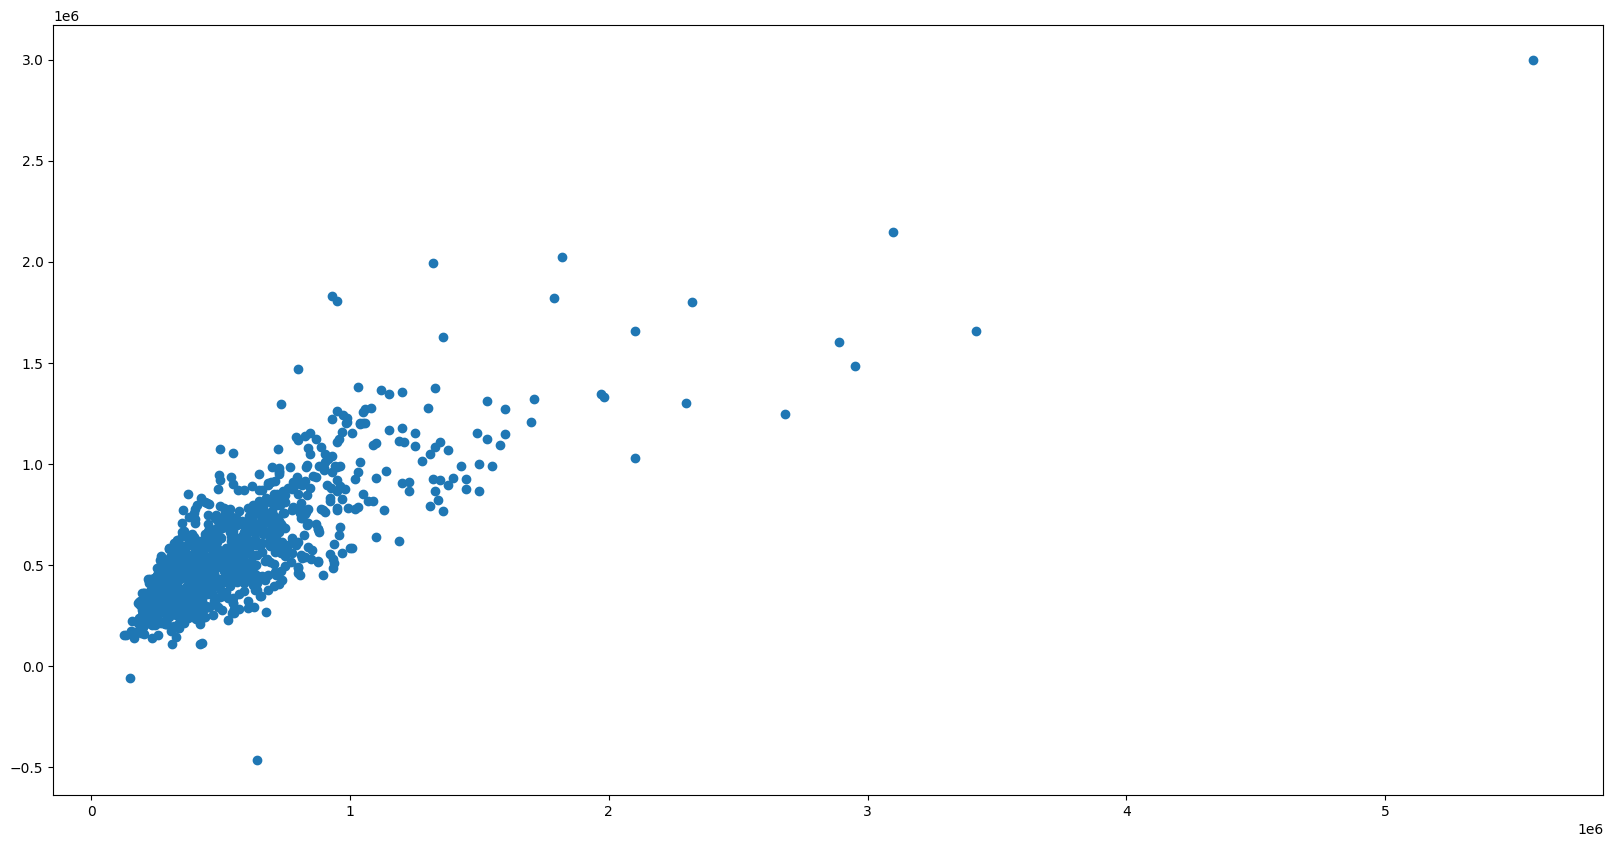

0.645501022847574

In [99]:
post = lr_clf.predict(x_test)
plt.scatter(y_test,post)
plt.show()
r2_score(y_test,post)

In [89]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=8, test_size=0.18, random_state=5)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.67147257, 0.6802261 , 0.66359455, 0.65639052, 0.62836834,
       0.65692682, 0.66975272, 0.67292458])

In [79]:
# from sklearn.model_selection import ShuffleSplit, cross_val_score
# from sklearn.ensemble import RandomForestClassifier

# cv = ShuffleSplit(n_splits=8, test_size=0.18, random_state=5)

# scores = cross_val_score(RandomForestClassifier(n_estimators=4), x, y, cv=list(cv.split(x)))

# print("Cross-validation scores:", scores)

In [57]:
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import cross_val_score

# cross_val_score(LinearRegression(), x, y, cv=8)

In [58]:
# from sklearn.model_selection import ShuffleSplit, cross_val_score
# from sklearn.svm import SVC

# cv = ShuffleSplit(n_splits=8, test_size=0.18, random_state=5)

# cross_val_score(SVC(), x, y, cv=list(cv.split(x)))


In [59]:
# from sklearn.svm import SVC
# svm = SVC()
# svm.fit(x_train,y_train)
# svm.score(x_test,y_test)

In [60]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=4)
# rf.fit(x_train,y_train)
# rf.score(x_test,y_test)

In [61]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits= 3)
# kf

In [62]:
# using grid search method
# gf = GridsearchCV(model,{paramaters},cv,return_train_score=False) 
# gf.fit(x,y)

In [75]:
# import pandas as pd
# from sklearn.model_selection import GridSearchCV, ShuffleSplit
# from sklearn.linear_model import LinearRegression, Lasso
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import svm



# def find_best_model_using_gridsearchcv(X, y):
#     algos = {
        
#         # 'naive_bayes_gaussian': {
#         #     'model': GaussianNB(),
#         #     'params': {}
#         # },
#         # 'naive_bayes_multinomial': {
#         #     'model': MultinomialNB(),
#         #     'params': {}
#         # },
#         'lasso': {
#             'model': Lasso(),
#             'params': {
#                 'alpha': [1, 2],
#                 'selection': ['random', 'cyclic']
#             }
#         }
#         # 'decision_tree': {
#         #     'model': DecisionTreeRegressor(),
#         #     'params': {
#         #         'criterion': ['squared_error', 'friedman_mse','gini','entropy'],
#         #         'splitter': ['best', 'random']
#         #     }
#         # }
#     }

#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X, y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })

#     return pd.DataFrame(scores)

# # Example usage:
# # Assuming `x` and `y` are your features and target variable datasets
# find_best_model_using_gridsearchcv(x, y)
# # print(result)211

,model,best_score,best_params
0,lasso,0.669774,"{'alpha': 2, 'selection': 'random'}"


In [82]:
# import pandas as pd
# from sklearn.model_selection import GridSearchCV, ShuffleSplit
# from sklearn.linear_model import LinearRegression, Lasso
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import svm



# def find_best_model_using_gridsearchcv(X, y):
#     algos = {
#         'linear_regression': {
#             'model': Pipeline([
#                 ('scaler', StandardScaler()),
#                 ('regressor', LinearRegression())
#             ]),
#             'params': {
#                 'regressor__fit_intercept': [True, False]
#             }
#         },
#         'logistic_regression' : {
#             'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#             'params': {
#                 'C': [1,5,10]
#             }
#         }
#     }

#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X, y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })

#     return pd.DataFrame(scores)

# # Example usage:
# # Assuming `x` and `y` are your features and target variable datasets
# find_best_model_using_gridsearchcv(x, y)
# # print(result)211

In [83]:
# we cann observe Decision Tree gives the best model 
# so now we proceed with exporting the model  
# number of bedrooms	number of bathrooms	living area	lot area	number of floors	Postal Code	Distance from the airport

In [90]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)
dt_regressor.score(x_test, y_test)


0.7700214063209644

In [101]:
x_test

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,Postal Code,Distance from the airport
2175,4,1,1700,7800,1,122015,75
5678,4,1,1980,7015,1,122033,50
5106,2,1,940,8532,1,122031,79
10190,6,4,5480,189050,2,122067,59
1643,4,3,3880,9979,2,122011,62
...,...,...,...,...,...,...,...
8246,3,1,1130,12500,1,122051,61
7473,4,1,1650,7800,1,122046,61
8512,4,2,2440,11005,2,122053,78
2373,4,2,2010,16020,1,122015,50


In [111]:
def predict_price(num_bedrooms, num_bathrooms, living_area, lot_area, num_floors, postal_code, distance_from_airport):
    # Find the index of the Postal Code column in X
    loc_index = np.where(x.columns == 'Postal Code')[0][0]
    # Create a zero vector with the same length as the number of columns in X
    feature_vector = np.zeros(len(x.columns))
    # Assign input variables to the correct indices
    feature_vector[0] = num_bedrooms
    feature_vector[1] = num_bathrooms
    feature_vector[2] = living_area
    feature_vector[3] = lot_area
    feature_vector[4] = num_floors
    feature_vector[5] = distance_from_airport
    # Set the postal code feature in the vector
    if loc_index >= 0:
        feature_vector[loc_index] = postal_code
    # Use the trained decision tree regressor to predict the price
    return lr_clf.predict([feature_vector])[0]

In [116]:
predict_price(1,3,1500,3000,2,122067,50)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


379502.01605705917

In [117]:
predict_price(2,3,1500,3000,2,122067,50)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


348290.2201702148

In [121]:
predict_price(3,3,1500,3000,2,122065,50)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


319155.59310120344

In [120]:
predict_price(2,1,1500,3000,2,122067,50)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


361327.9317063838

In [123]:
# x['Postal Code'].unique()

In [125]:
def predict_price_dt(num_bedrooms, num_bathrooms, living_area, lot_area, num_floors, postal_code, distance_from_airport):
    # Find the index of the Postal Code column in X
    loc_index = np.where(x.columns == 'Postal Code')[0][0]
    # Create a zero vector with the same length as the number of columns in X
    feature_vector = np.zeros(len(x.columns))
    # Assign input variables to the correct indices
    feature_vector[0] = num_bedrooms
    feature_vector[1] = num_bathrooms
    feature_vector[2] = living_area
    feature_vector[3] = lot_area
    feature_vector[4] = num_floors
    feature_vector[5] = distance_from_airport
    # Set the postal code feature in the vector
    if loc_index >= 0:
        feature_vector[loc_index] = postal_code
    # Use the trained decision tree regressor to predict the price
    return dt_regressor.predict([feature_vector])[0]

In [129]:
predict_price_dt(1,3,1500,3000,2,122020,50)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


335000.0

In [128]:
predict_price_dt(1,3,1500,3000,2,122067,50)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


380000.0

In [130]:
#typical decision tree behaviour
#observation this will not give flexible results rather will show tendency of classifiying the results 

In [132]:
import pickle
with open('house_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [134]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))